In [282]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, text

In [283]:
# criando o DataFrame a partir do CSV
df = pd.read_csv('shopping_behavior.csv')

In [284]:
# visualizando as 5 primeiras linhas do DataFrame
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,31,PayPal,Annually


In [285]:
# criando um banco SQLite temporário
engine = create_engine('sqlite:///:memory:')

In [286]:
# observando as informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Previous Purchases      3900 non-null   int64  
 14  Payment Method          3900 non-null   

In [287]:
# transformando o DataFrame em uma tabela SQL 
df.to_sql('shopping_sales', engine, index=False)

3900

In [288]:
# inspecionando o banco de dados para listar todas as tabelas existentes
inspector = inspect(engine)
inspector.get_table_names()

['shopping_sales']

In [289]:
# função para executar consultas SQL e retornar um DataFrame
def sql(query):
    with engine.connect() as conexao:
        consulta = conexao.execute(text(query))
        df = consulta.fetchall()
    return pd.DataFrame(df, columns=consulta.keys())

In [290]:
# visualizando as 5 primeiras linhas da tabela SQL
query = 'SELECT * FROM shopping_sales LIMIT 5;'
sql(query)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,31,PayPal,Annually


In [291]:
# consultando a idade média, gasto médio e avaliação média dos clientes
query = '''SELECT AVG(Age) AS idade_media, AVG("Purchase Amount (USD)") AS gasto_medio, 
AVG("Review Rating") AS avaliacao_media
FROM shopping_sales;'''
sql(query)

,idade_media,gasto_medio,avaliacao_media
0,44.068462,59.764359,3.749949


In [292]:
# contando o total de assinaturas
query = '''SELECT "Subscription Status", COUNT(*) AS total_assinaturas
FROM shopping_sales
GROUP BY "Subscription Status";'''
sql(query)

,Subscription Status,total_assinaturas
0,No,2847
1,Yes,1053


In [293]:
# listando os itens únicos comprados
query = 'SELECT DISTINCT "Item Purchased" FROM shopping_sales;'
sql(query)

,Item Purchased
0,Blouse
1,Sweater
2,Jeans
3,Sandals
4,Sneakers
5,Shirt
6,Shorts
7,Coat
8,Handbag
9,Shoes


In [294]:
# contando o total de vendas por item, ordenando do menor para o maior
query = '''SELECT "Item Purchased", COUNT(*) AS total_vendidos
FROM shopping_sales
GROUP BY "Item Purchased" 
ORDER BY total_vendidos ASC;'''
df_total_vendas = sql(query)
df_total_vendas

,Item Purchased,total_vendidos
0,Jeans,124
1,Gloves,140
2,Backpack,143
3,Boots,144
4,Sneakers,145
5,T-shirt,147
6,Shoes,150
7,Hoodie,151
8,Handbag,153
9,Hat,154


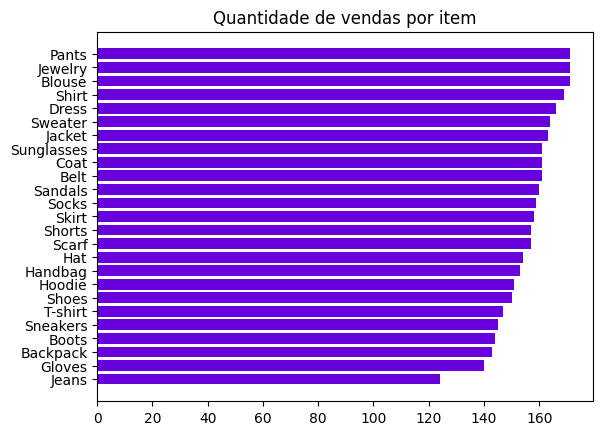

In [295]:
# plotando o gráfico de barras horizontais
plt.barh(df_total_vendas['Item Purchased'], df_total_vendas['total_vendidos'], color="#6700DD")
plt.title('Quantidade de vendas por item')
plt.show()

In [296]:
query = 'SELECT * FROM shopping_sales LIMIT 5;'
sql(query)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,31,PayPal,Annually


In [297]:
# total de vendas em USD por categoria, ordenando do maior para o menor
query = '''SELECT "Category", SUM("Purchase Amount (USD)") AS "preço_total(USD)"
FROM shopping_sales
GROUP BY Category
ORDER BY "preço_total(USD)" DESC;'''
df_total_vendas_por_categoria = sql(query)
df_total_vendas_por_categoria

,Category,preço_total(USD)
0,Clothing,104264
1,Accessories,74200
2,Footwear,36093
3,Outerwear,18524


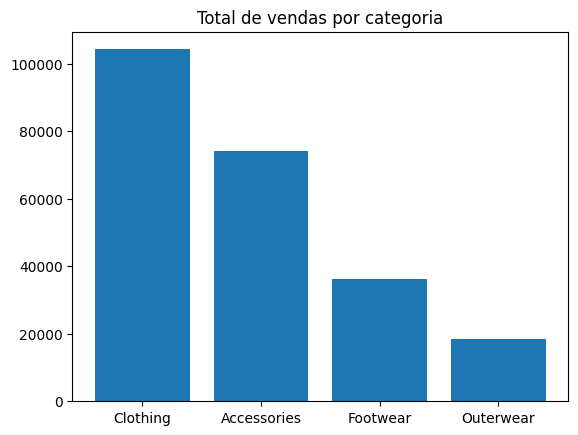

In [298]:
# plotando o gráfico de barras
plt.bar(df_total_vendas_por_categoria['Category'], df_total_vendas_por_categoria['preço_total(USD)'])
plt.title('Total de vendas por categoria')
plt.show()

In [299]:
# encontrando o maior valor de compra na categoria "Clothing"
query = '''SELECT "Customer ID", "Gender", "Item Purchased", "Category", MAX("Purchase Amount (USD)") AS "preço"
FROM shopping_sales
WHERE Category = "Clothing"'''
sql(query)

,Customer ID,Gender,Item Purchased,Category,preço
0,456,Male,Blouse,Clothing,100


In [300]:
# total de vendas por categoria e estação do ano, ordenando do maior para o menor
query = '''SELECT "Category", "Season", SUM("Purchase Amount (USD)") AS total_vendas
FROM shopping_sales
GROUP BY Category, Season
ORDER BY total_vendas DESC;'''
sql(query)

,Category,Season,total_vendas
0,Clothing,Spring,27692
1,Clothing,Winter,27274
2,Clothing,Fall,26220
3,Clothing,Summer,23078
4,Accessories,Fall,19874
5,Accessories,Summer,19028
6,Accessories,Winter,18291
7,Accessories,Spring,17007
8,Footwear,Spring,9555
9,Footwear,Summer,9393


In [301]:
query = 'SELECT * FROM shopping_sales LIMIT 5;'
sql(query)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,31,PayPal,Annually


In [302]:
# filtrando as compras com avaliação máxima (5 estrelas)
query = '''SELECT "Item Purchased", "Category", "Purchase Amount (USD)", "Review Rating"
FROM shopping_sales
WHERE "Review Rating" = 5;'''
sql(query)

,Item Purchased,Category,Purchase Amount (USD),Review Rating
0,Shorts,Clothing,56,5.0
1,Belt,Accessories,75,5.0
2,Jewelry,Accessories,78,5.0
3,Backpack,Accessories,38,5.0
4,Shorts,Clothing,20,5.0
...,...,...,...,...
63,Jewelry,Accessories,68,5.0
64,Skirt,Clothing,67,5.0
65,Blouse,Clothing,84,5.0
66,Belt,Accessories,65,5.0


In [303]:
# calculando o valor médio gasto por gênero
query = '''SELECT Gender, AVG("Purchase Amount (USD)") AS valor_medio_gasto
FROM shopping_sales
GROUP BY Gender;'''
valor_medio_por_genero = sql(query)
valor_medio_por_genero

,Gender,valor_medio_gasto
0,Female,60.249199
1,Male,59.536199


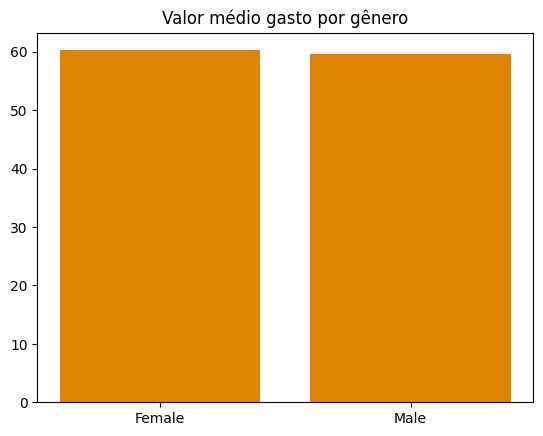

In [304]:
# plotando o gráfico de barras
plt.bar(valor_medio_por_genero['Gender'], valor_medio_por_genero['valor_medio_gasto'], color="#DD8500")
plt.title('Valor médio gasto por gênero')
plt.show()

In [305]:
# total de vendas por tamanho, ordenando do maior para o menor
query = '''SELECT Size, COUNT(*) AS total_compras
FROM shopping_sales
GROUP BY Size
ORDER BY total_compras DESC;'''
df_total_vendas_por_tamanho = sql(query)
df_total_vendas_por_tamanho

,Size,total_compras
0,M,1755
1,L,1053
2,S,663
3,XL,429


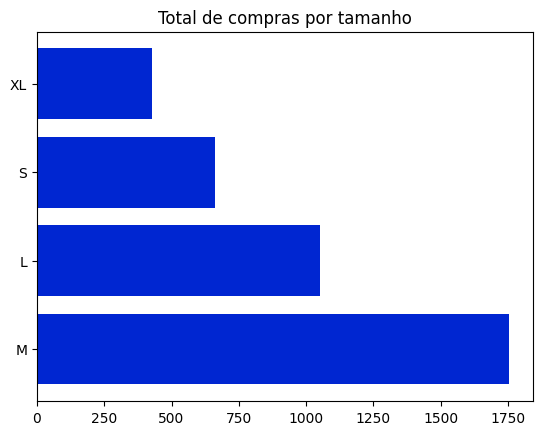

In [306]:
# plotando o gráfico de barras horizontais
plt.barh(df_total_vendas_por_tamanho['Size'], df_total_vendas_por_tamanho['total_compras'], color="#0026D1")
plt.title('Total de compras por tamanho')
plt.show()